In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
iris = datasets.load_iris()

In [3]:
x = iris.data[:,:2]
y = iris.target

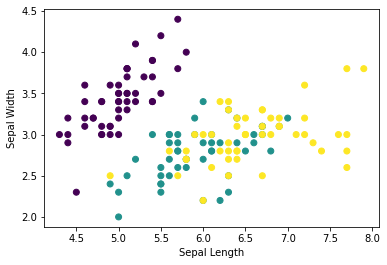

In [4]:
plt.scatter(x[:,0], x[:,1,], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [5]:
kmean = KMeans(n_clusters=5, random_state=1)

kmean.fit(x)

KMeans(n_clusters=5, random_state=1)

In [6]:
centers = kmean.cluster_centers_
print(centers)

[[6.56216216 3.05945946]
 [5.1875     3.6375    ]
 [5.85777778 2.71333333]
 [4.76666667 2.89166667]
 [7.475      3.125     ]]


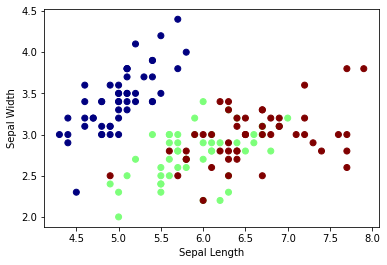

In [7]:
labels = kmean.labels_

plt.scatter(x[:,0], x[:,1,], c=y, cmap='jet')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

### Mall Customer Segmentation

https://www.analyticsvidhya.com/blog/2021/05/k-means-clustering-with-mall-customer-segmentation-data-full-detailed-code-and-explanation/

In [17]:
import seaborn as sns

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv('customer.csv')

In [16]:
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [14]:
len(data)

200

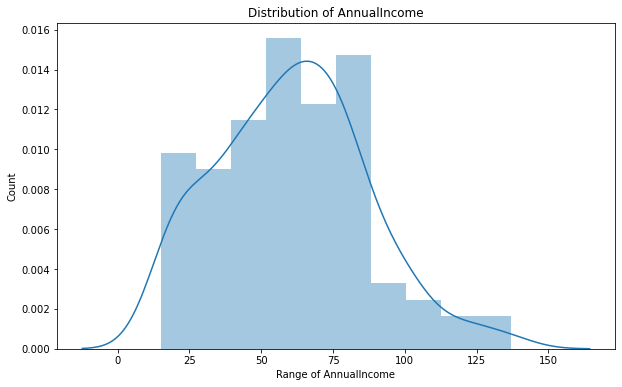

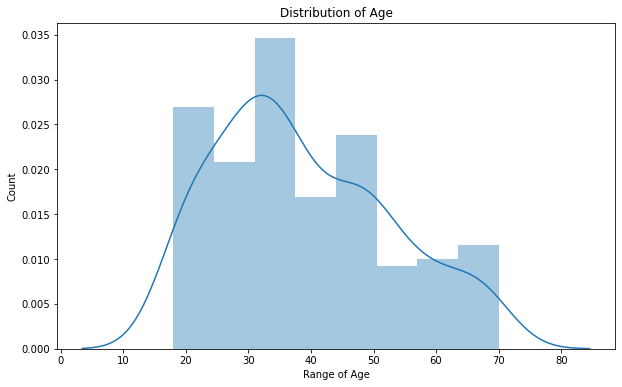

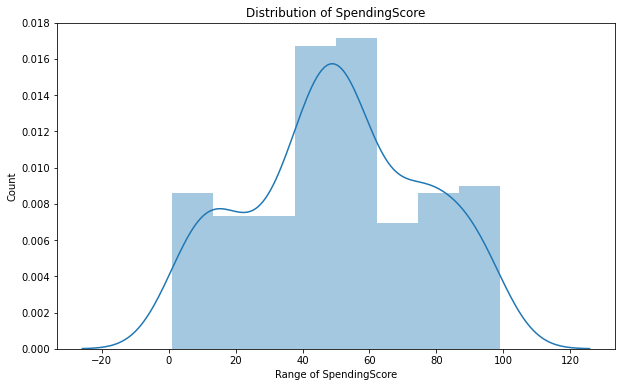

In [23]:
for col in ['AnnualIncome', 'Age', 'SpendingScore']:
    plt.figure(figsize=(10, 6))
    sns.distplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'Range of {col}')
    plt.ylabel('Count')
    plt.show()

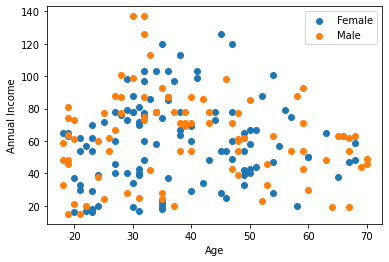

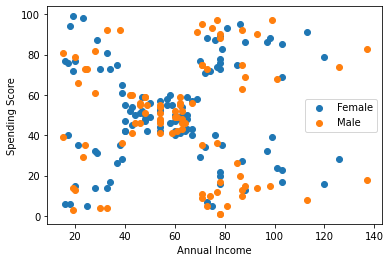

In [40]:
plt.scatter(data[data.Gender == 'Female']['Age'], data[data.Gender == 'Female']['AnnualIncome'], label='Female')
plt.scatter(data[data.Gender == 'Male']['Age'], data[data.Gender == 'Male']['AnnualIncome'], label='Male')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

plt.scatter(data[data.Gender == 'Female']['AnnualIncome'], data[data.Gender == 'Female']['SpendingScore'], label='Female')
plt.scatter(data[data.Gender == 'Male']['AnnualIncome'], data[data.Gender == 'Male']['SpendingScore'], label='Male')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [46]:
x = data[['AnnualIncome', 'SpendingScore']]

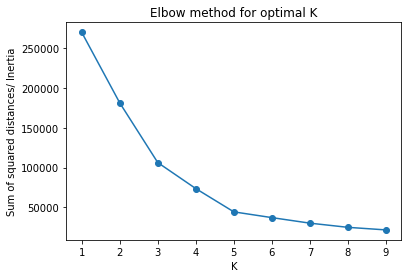

In [56]:
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=123)
    kmean.fit(x)
    sum_of_squared_distances.append(kmean.inertia_)

plt.plot(K, sum_of_squared_distances, marker='o')
plt.xlabel('K')
plt.ylabel('Sum of squared distances/ Inertia')
plt.title('Elbow method for optimal K')
plt.show()

In [43]:
kmean = KMeans(n_clusters=5, random_state=123)

In [48]:
kmean.fit(x)

KMeans(n_clusters=5, random_state=123)

In [49]:
y = kmean.predict(x)

In [50]:
data['Label'] = y
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [51]:
data['Label'].value_counts()

0    81
1    39
2    35
3    23
4    22
Name: Label, dtype: int64

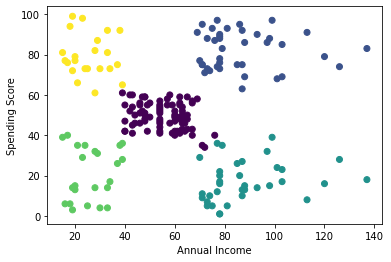

In [55]:
plt.scatter(data['AnnualIncome'], data['SpendingScore'], c=data['Label'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [71]:
from sklearn.metrics import silhouette_score

In [72]:
silhouette_score(data[['AnnualIncome', 'SpendingScore']], data['Label'])

0.31088597081846453

In [57]:
x2 = data[['Age', 'AnnualIncome', 'SpendingScore']]

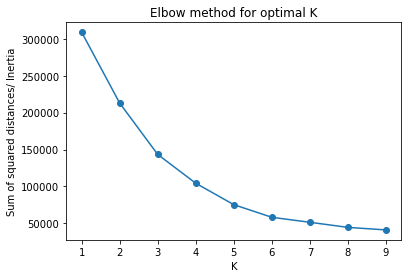

In [58]:
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=123)
    kmean.fit(x2)
    sum_of_squared_distances.append(kmean.inertia_)

plt.plot(K, sum_of_squared_distances, marker='o')
plt.xlabel('K')
plt.ylabel('Sum of squared distances/ Inertia')
plt.title('Elbow method for optimal K')
plt.show()

In [59]:
kmean = KMeans(n_clusters=6, random_state=123)
kmean.fit(x2)
y2 = kmean.predict(x2)

In [65]:
x2['Label'] = y2
x2['Label'].value_counts()

0    45
1    39
2    38
3    35
4    22
5    21
Name: Label, dtype: int64

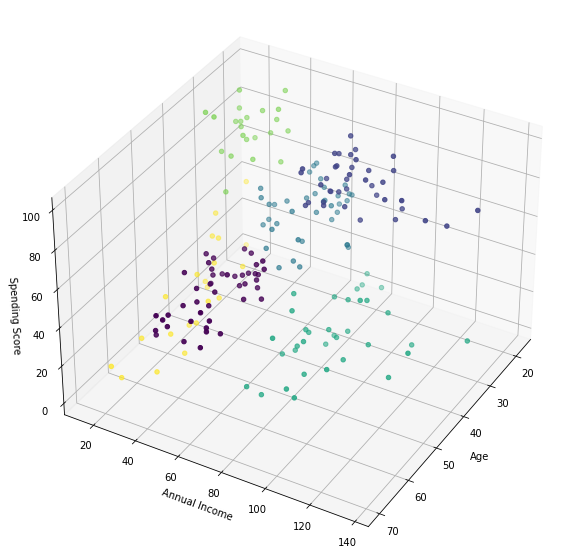

In [70]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2.Age, x2.AnnualIncome, x2.SpendingScore, c=x2.Label)
ax.view_init(35, 30)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('Spending Score')
plt.show()

In [73]:
silhouette_score(x2[['AnnualIncome', 'SpendingScore', 'Age']], x2[['Label']])

0.4523443947724053

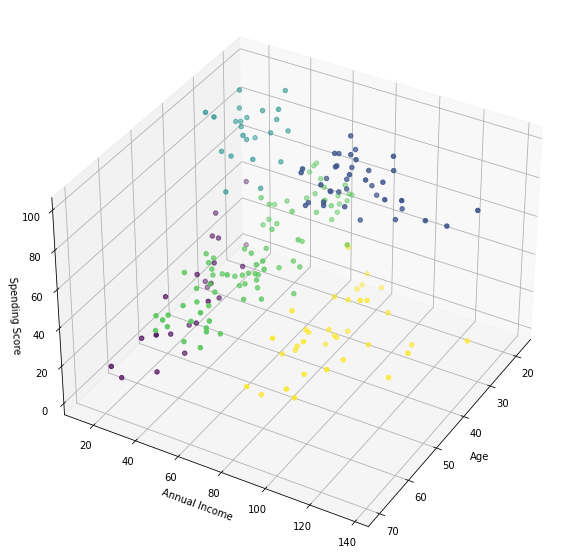

Silhouette Score: 0.44428597560893024


In [77]:
kmean = KMeans(n_clusters=5, random_state=123)
kmean.fit(x2)
y2 = kmean.predict(x2)

x2['Label'] = y2

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2.Age, x2.AnnualIncome, x2.SpendingScore, c=x2.Label)
ax.view_init(35, 30)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('Spending Score')
plt.show()

df = x2[['AnnualIncome', 'SpendingScore', 'Age']]
dflabel = x2[['Label']]
print(f'Silhouette Score: {silhouette_score(df, dflabel)}')

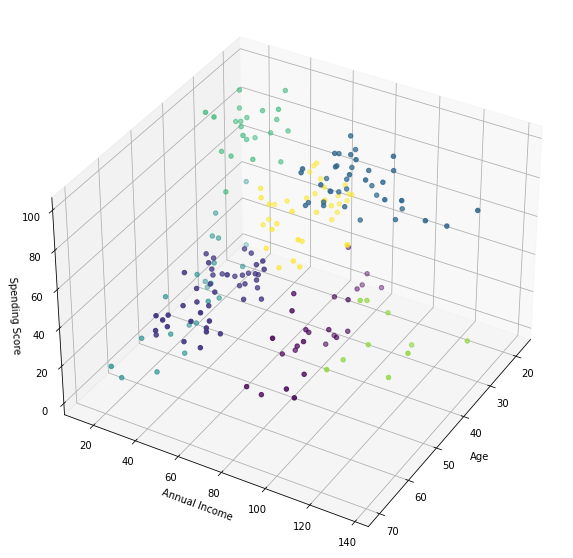

Silhouette Score: 0.43509714214250295


In [78]:
kmean = KMeans(n_clusters=7, random_state=123)
kmean.fit(x2)
y2 = kmean.predict(x2)

x2['Label'] = y2

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2.Age, x2.AnnualIncome, x2.SpendingScore, c=x2.Label)
ax.view_init(35, 30)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('Spending Score')
plt.show()

df = x2[['AnnualIncome', 'SpendingScore', 'Age']]
dflabel = x2[['Label']]
print(f'Silhouette Score: {silhouette_score(df, dflabel)}')